In [1]:
import sys
import os
import time

sys.path.insert(0,'../../')
sys.path.insert(0,'../../py')

import parameters
import utilities
import spectrogram_utilities
import output_utilities
import spectrogram_output_visualiser
import whistler_cuts_db_creation

import numpy as np
import pandas as pd
import h5py


from scipy import signal
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn import manifold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# matplotlib.get_backend()
%matplotlib inline

awd_event = 1
site = parameters.sites[0]

In [3]:
# get all files from the site
files = utilities.all_files(awd_event, site)
np.random.shuffle(files)
# split files into training, validation, and test files using the ration of 70%-15%-15%
training_files = files[0:int(0.7*len(files))]
validation_files = files[int(0.7*len(files)):int(0.85*len(files))]
test_files = files[int(0.85*len(files)):]

print(len(files), len(training_files), len(validation_files), len(test_files))

2196 1537 329 330


In [4]:
# database_name = 'whistler_cuts.h5'
# whistler_cuts_db(awd_event, site, training_files, database_name, verbose=True)

In [3]:
data = whistler_cuts_db_creation.load_whistler_cuts_db(awd_event, site, database_name='whistler_cuts.h5', verbose=True)


Loading whistler cuts from database for awdEvent1/marion
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........
Runtime: 8.16 seconds


(257, 853) (257, 853)


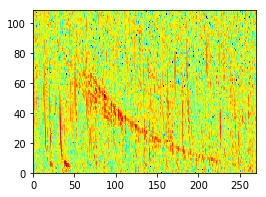

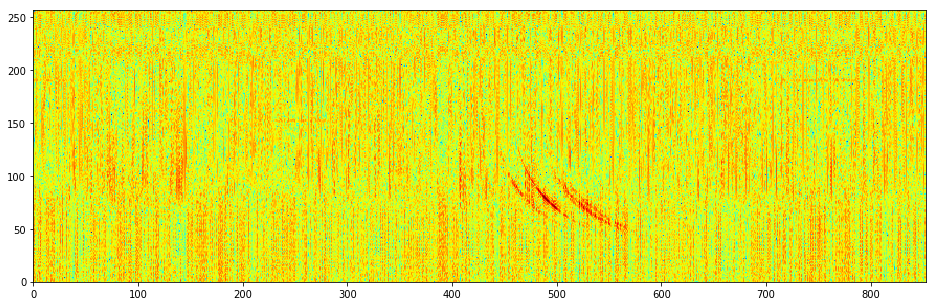

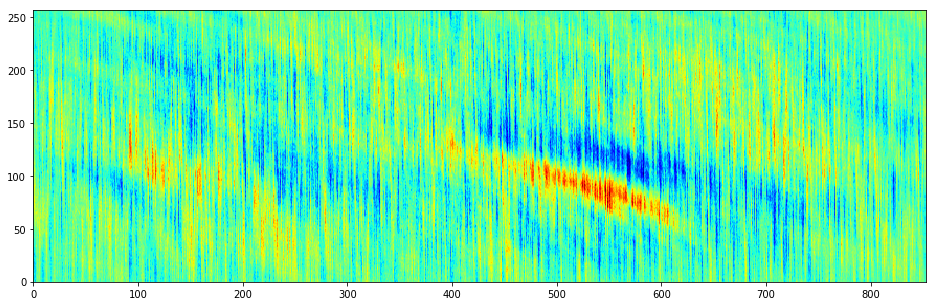

In [15]:
whistler = data[np.random.randint(len(data))]
whistler = whistler.reshape((109,270))

file = utilities.random_file(awd_event, site)

data_location = os.path.join(parameters.database_location, 'awdEvents'+str(awd_event), site, site+'_data')
indexed_output , times, frequencies, spectrogram = spectrogram_output_visualiser.spectrogram_and_output(awd_event, site, file, output=False, verbose=False, zscore=True, method=None, output_distribution='uniform')

corr = signal.correlate(spectrogram, whistler, mode='same')

fft = np.fft.fft2(corr)
print(corr.shape, fft.shape)
fig = plt.figure(figsize=(4,3))
img = plt.pcolormesh(whistler, cmap='jet')
plt.show()
fig = plt.figure(figsize=(16,5))
img = plt.pcolormesh(spectrogram, cmap='jet')
plt.show()
fig = plt.figure(figsize=(16,5))
img = plt.pcolormesh(corr, cmap='jet')
plt.show()
# fig = plt.figure(figsize=(16,5))
# img = plt.pcolormesh(abs(np.fft.fftshift(fft)), cmap='jet')
# plt.show()


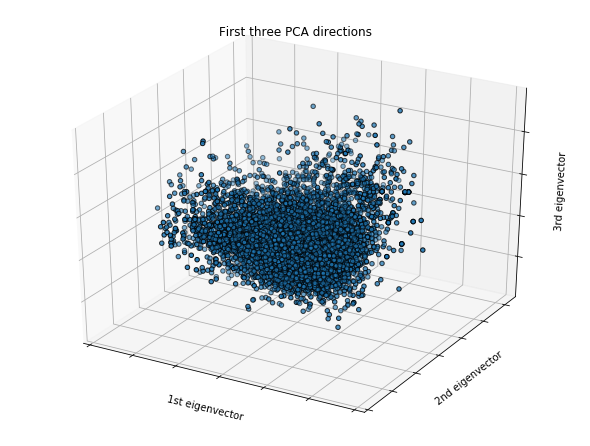

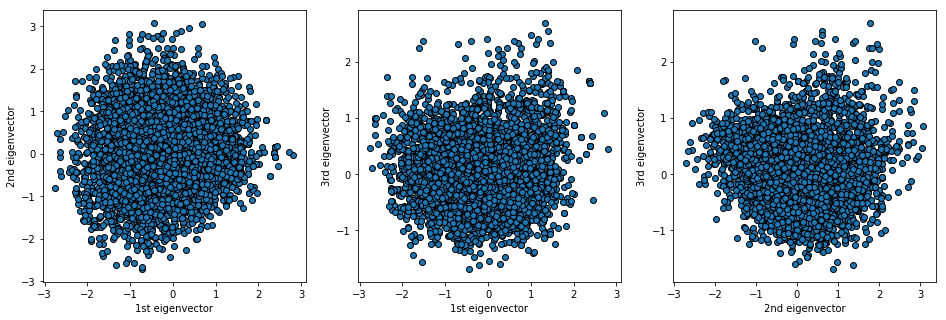

In [11]:
# PCA
start = time.time()
_data = PCA(n_components=3).fit_transform(data)
end = time.time()
print("\nRuntime: {:.2f} seconds".format(end - start))

_data = np.asarray(_data, dtype=np.float32)
_data = np.vstack(_data[:])

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(_data[:, 0], _data[:, 1], _data[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=20)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(_data[:, 0], _data[:, 1], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.subplot(1,3,2)
plt.scatter(_data[:, 0], _data[:, 2], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("3rd eigenvector")
plt.subplot(1,3,3)
plt.scatter(_data[:, 1], _data[:, 2], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("2nd eigenvector")
plt.ylabel("3rd eigenvector")

plt.show()


Runtime: 49.26 seconds


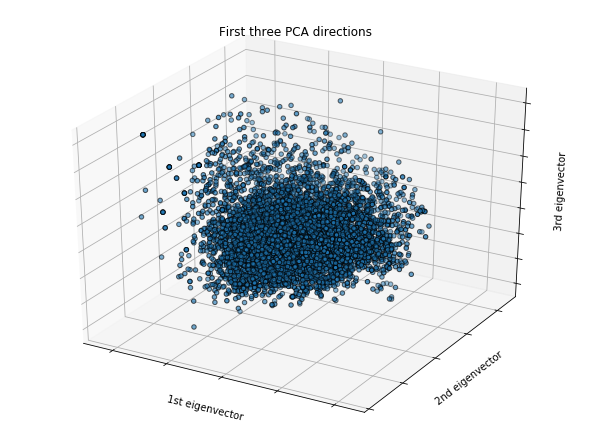

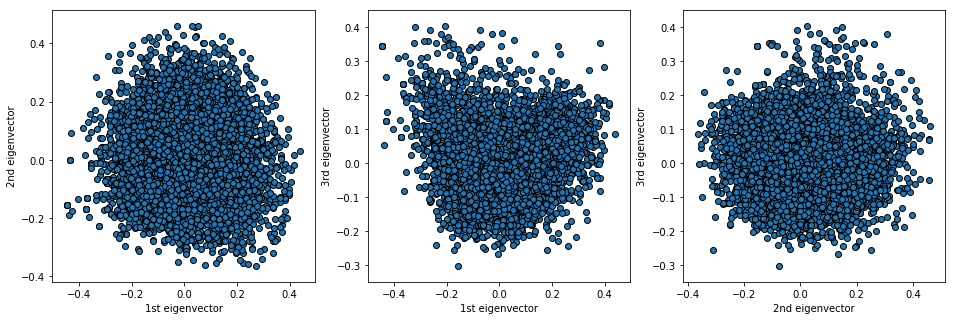

In [110]:
# KPCA
start = time.time()
_data = KernelPCA(kernel="cosine", fit_inverse_transform=True, n_components=10).fit_transform(data)
end = time.time()
print("\nRuntime: {:.2f} seconds".format(end - start))

_data = np.asarray(_data, dtype=np.float32)
_data = np.vstack(_data[:])

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(_data[:, 0], _data[:, 1], _data[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=20)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(_data[:, 0], _data[:, 1], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.subplot(1,3,2)
plt.scatter(_data[:, 0], _data[:, 2], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("3rd eigenvector")
plt.subplot(1,3,3)
plt.scatter(_data[:, 1], _data[:, 2], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("2nd eigenvector")
plt.ylabel("3rd eigenvector")

plt.show()


Runtime: 1754.26 seconds


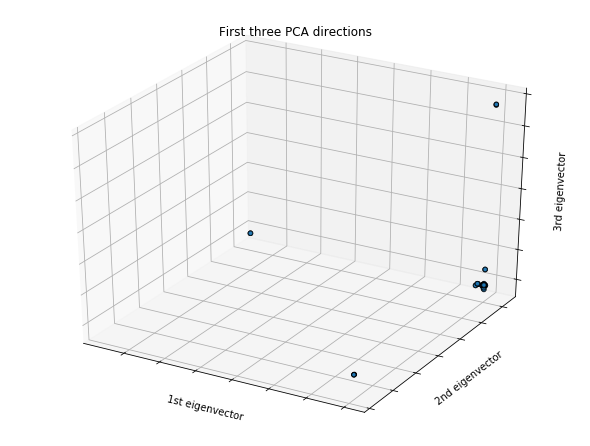

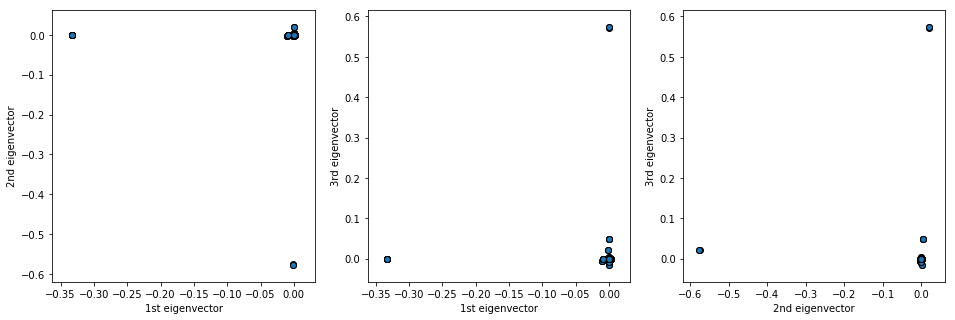

In [8]:
# LLE
start = time.time()
_data, err = manifold.locally_linear_embedding(data, n_neighbors=12, n_components = 3,method='modified')
end = time.time()
print("\nRuntime: {:.2f} seconds".format(end - start))
_data = np.asarray(_data, dtype=np.float32)
_data = np.vstack(_data[:])

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(_data[:, 0], _data[:, 1], _data[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=20)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(_data[:, 0], _data[:, 1], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.subplot(1,3,2)
plt.scatter(_data[:, 0], _data[:, 2], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("3rd eigenvector")
plt.subplot(1,3,3)
plt.scatter(_data[:, 1], _data[:, 2], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("2nd eigenvector")
plt.ylabel("3rd eigenvector")

plt.show()


Runtime: 2540.95 seconds


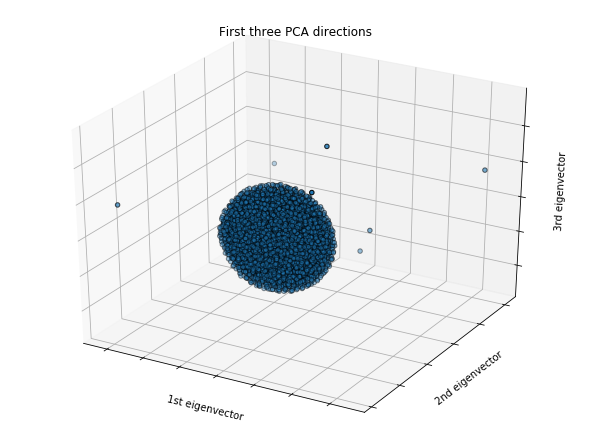

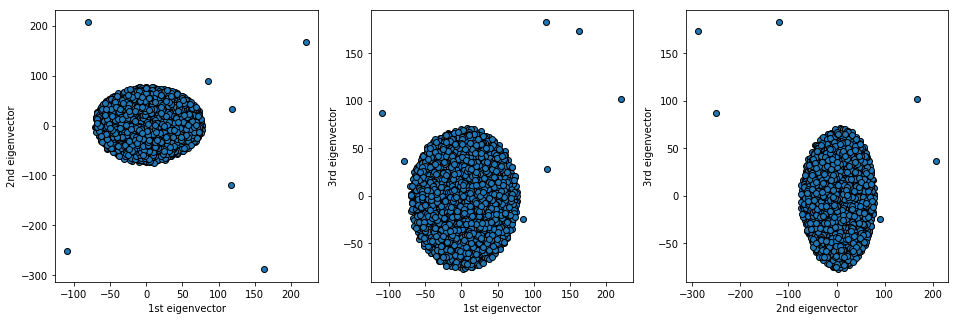

In [9]:
# T-SNE
start = time.time()
_data = manifold.TSNE(n_components = 3, perplexity = 5).fit_transform(data)
end = time.time()
print("\nRuntime: {:.2f} seconds".format(end - start))

_data = np.asarray(_data, dtype=np.float32)
_data = np.vstack(_data[:])

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(_data[:, 0], _data[:, 1], _data[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=20)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(_data[:, 0], _data[:, 1], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.subplot(1,3,2)
plt.scatter(_data[:, 0], _data[:, 2], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("3rd eigenvector")
plt.subplot(1,3,3)
plt.scatter(_data[:, 1], _data[:, 2], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel("2nd eigenvector")
plt.ylabel("3rd eigenvector")

plt.show()